# ** Prever consumo de combustivel**

> Os dados dizem respeito ao consumo de combustível na cidade em milhas por galão. Será utilizado um total de 8 atributos na previsão de consumo de combustível.
> Um galão americano contém 3,79 litros. Uma milha equivale a 1609,34 metros.

> <img src="https://raw.githubusercontent.com/MonizGarcia5/Data_Science/main/Prever_Consumo_Veiculo/ImgCarro.jpg" />


##  Informações dos atributos

1) mpg : consumo de combustível

2) cilindros

3) deslocamento

4) potência

5) peso

6) aceleração

7) ano modelo

8) origem

9) nome do carro

Fonte dos dados: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG

## Indice

1) Pacotes utilizados

2) Pre-processamento,Exploracao e Analise de dados

3) Avaliando o modelo

4) Conclusão

## 1) Pacotes utilizados

In [1]:
# carregar e tratar o conjunto de dados
import pandas as pd
# Biblioteca para plotagem de relatorio
import matplotlib.pyplot as plt
# Exploração e análise de dados
import seaborn as sns
# Biblioteca do algoritmo Kmeans
from sklearn.cluster import KMeans
# Pre- processamento de dados
from sklearn.preprocessing import LabelEncoder
# Carregar e tratar o conjunto de dados
import numpy as np
# Métricas de avaliação do modelo de Regressão Linear
from sklearn import metrics
# Biblioteca utilizada para treinamento e test
from sklearn.model_selection import train_test_split
# Modelo de regressão Linear
from sklearn.linear_model import LinearRegression

## 2)  Pre-processamento,Exploração e Analise de dados

In [2]:
df_carro = pd.read_csv('C:/Portfolio/RegressaoLinear/DataSet/carros.csv')

In [3]:
df_carro

mpg  cilindros  deslocamento  potencia    peso  acelaracao  anomodelo  \
0    18.0        8.0         307.0     130.0  3504.0        12.0       70.0   
1    15.0        8.0         350.0     165.0  3693.0        11.5       70.0   
2    18.0        8.0         318.0     150.0  3436.0        11.0       70.0   
3    16.0        8.0         304.0     150.0  3433.0        12.0       70.0   
4    17.0        8.0         302.0     140.0  3449.0        10.5       70.0   
..    ...        ...           ...       ...     ...         ...        ...   
387  27.0        4.0         140.0      86.0  2790.0        15.6       82.0   
388  44.0        4.0          97.0      52.0  2130.0        24.6       82.0   
389  32.0        4.0         135.0      84.0  2295.0        11.6       82.0   
390  28.0        4.0         120.0      79.0  2625.0        18.6       82.0   
391  31.0        4.0         119.0      82.0  2720.0        19.4       82.0   

     origem                  nomecarro  
0       1.0  chevrolet chevelle malibu  
1       1.0          buick skylark 320  
2       1.0         plymouth satellite  
3       1.0              amc rebel sst  
4       1.0                ford torino  
..      ...                        ...  
387     1.0            ford mustang gl  
388     2.0                  vw pickup  
389     1.0              dodge rampage  
390     1.0                ford ranger  
391     1.0                 chevy s-10  

[392 rows x 9 columns]

In [5]:
df_carro.describe()

mpg   cilindros  deslocamento    potencia         peso  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acelaracao   anomodelo      origem  
count  392.000000  392.000000  392.000000  
mean    15.541327   75.979592    1.576531  
std      2.758864    3.683737    0.805518  
min      8.000000   70.000000    1.000000  
25%     13.775000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.025000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

In [6]:
df_carro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cilindros     392 non-null    float64
 2   deslocamento  392 non-null    float64
 3   potencia      392 non-null    float64
 4   peso          392 non-null    float64
 5   acelaracao    392 non-null    float64
 6   anomodelo     392 non-null    float64
 7   origem        392 non-null    float64
 8   nomecarro     392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 27.7+ KB


In [7]:
from pandas_profiling import ProfileReport

In [8]:
relatorio = ProfileReport(df_carro, title='Relatorio Clientes do Ecommerce')
relatorio.to_file('relatorio_ecommerce.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
relatorio

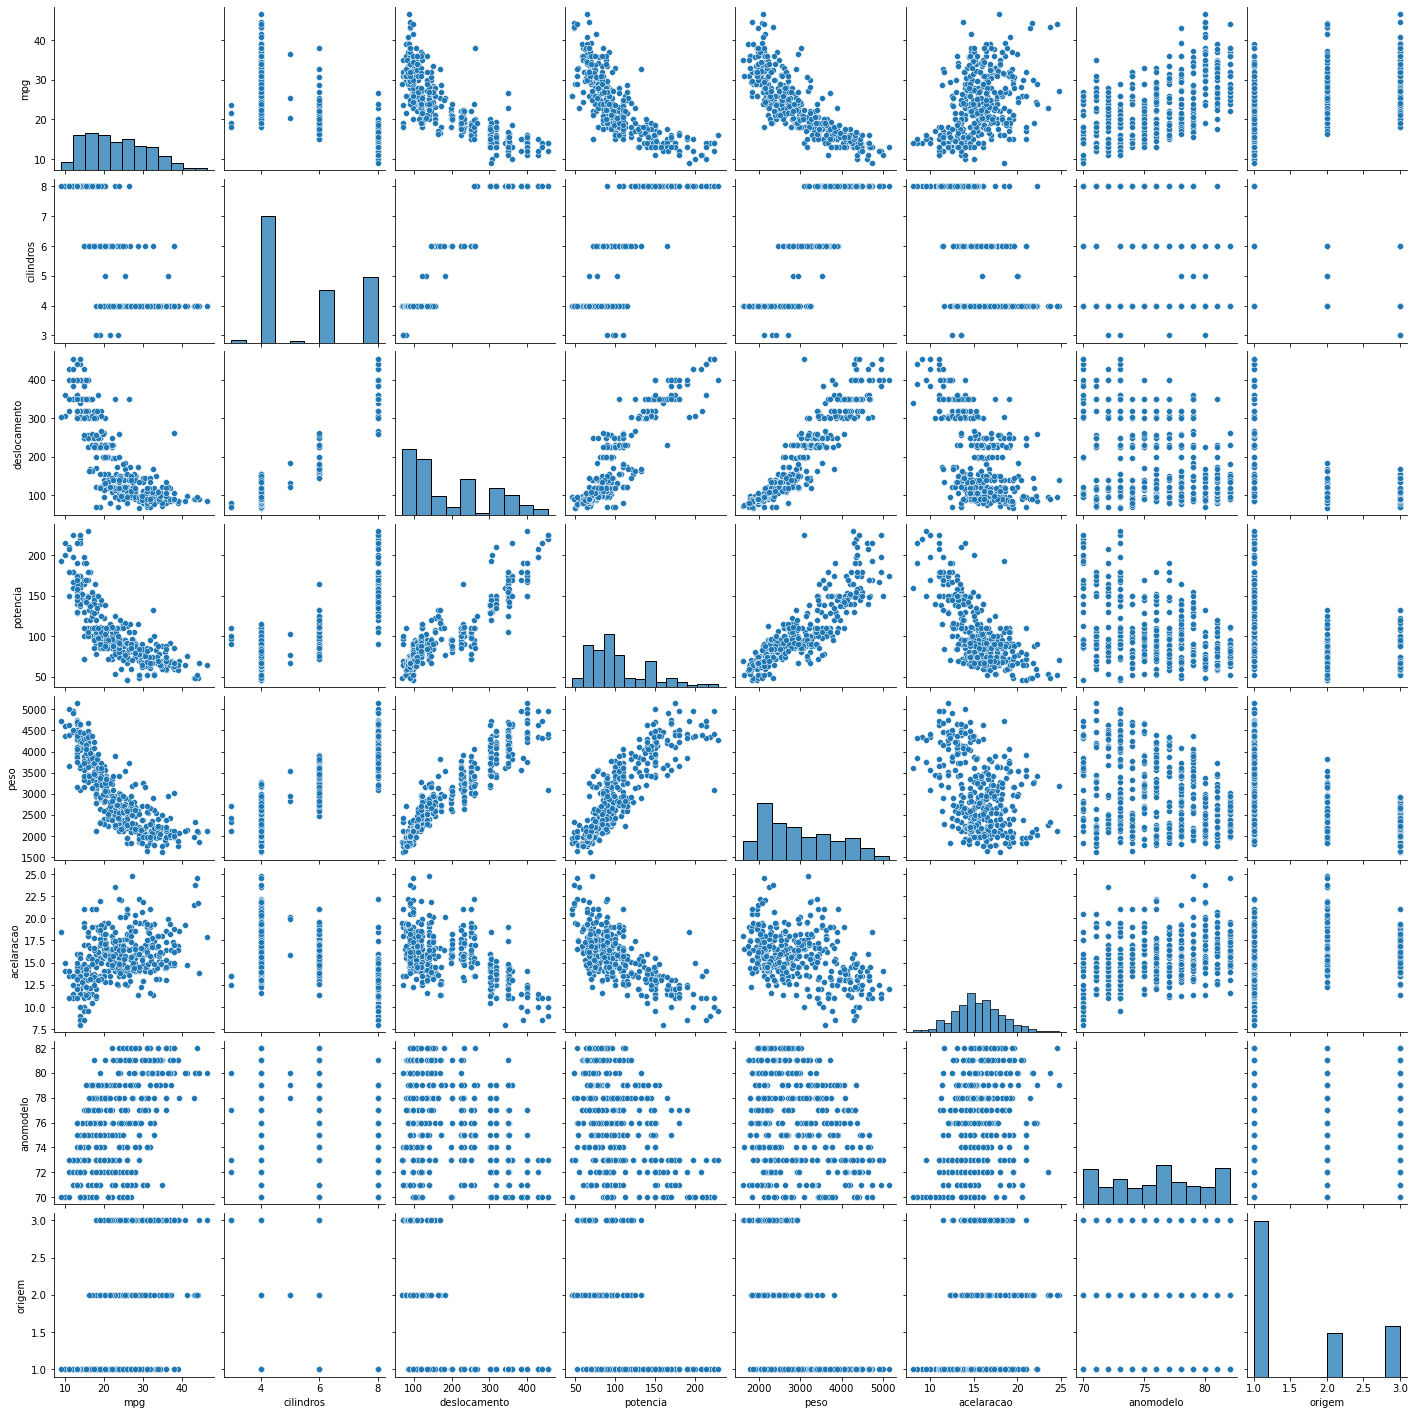

In [10]:
sns.pairplot(df_carro)

### Considerações :

1- Se o peso do veiculo aumenta o consumo de combustivel também aumenta.
2- Quanto menor o peso do veículo menor será o consumo de combustivel.
3- Quando mais potencia o veiculo tiver maior será o consumo de combustivel. 
3- Quando menos potencia o veiculo tiver menor será o  consumo de combustivel. 
4- Maiores deslocamentos consumem  mais combustivel. 
5- Quando menor o deslocamento  menor será o consumo de combustivel .


## 3) Avaliando o modelo

In [12]:
y = df_carro['mpg']

In [13]:
X = df_carro[['cilindros','deslocamento','potencia','peso','acelaracao','anomodelo','origem']]

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
lm.coef_

array([-0.35963797,  0.01579344, -0.02806989, -0.00600577,  0.04119833,
        0.742086  ,  1.67379885])

In [18]:
ỹ = lm.predict(X_test)

Text(0, 0.5, 'ỹ predito')

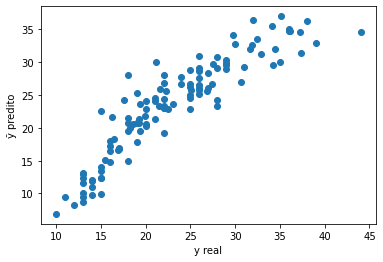

In [19]:
plt.scatter(y_test, ỹ)
plt.xlabel('y real')
plt.ylabel('ỹ predito')

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, ỹ))
print('MSE:', metrics.mean_squared_error(y_test, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ỹ)))
print('R:', metrics.r2_score(y_test,ỹ))

MAE: 2.438020350355287
MSE: 10.065877783589347
RMSE: 3.1726767537190654
R: 0.809736127618413


In [21]:
def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r

In [22]:
print('R-adjust:', adjusted_R(y_test, ỹ, X_train.shape[1]))

R-adjust: 0.7976284266486756


## 4) **Conclusão**

1) Os atributos : peso, potencia e deslocamento influenciam fortemente o consumo de combustivel.

2) Se o peso do veiculo aumenta o consumo de combustivel também aumenta.

3) Quanto menor o peso do veículo menor será o consumo de combustivel.

4) Quando mais potencia o veiculo tiver maior será o consumo de combustivel. 

5) Quando menor a potencia do veiculo menor será o consumo de combustivel. 

6) Maiores deslocamentos consumem  mais combustivel. 

7) Quando menor o deslocamento menor será o consumo de combustivel. 